# Clipping 
This is to clip raster landsat files to the 100 m buffer around the Swan River Watershed.
Resource: https://www.earthdatascience.org/courses/use-data-open-source-python/intro-raster-data-python/raster-data-processing/crop-raster-data-with-shapefile-in-python/

In [1]:
#Packages
import os
import rasterio as rio
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from shapely.geometry import mapping
import rioxarray as rxr
import xarray as xr
import geopandas as gpd
from matplotlib.colors import ListedColormap
import cartopy.crs as ccrs
from rasterio import plot
from rasterio.plot import show
from rasterio.plot import plotting_extent
from rasterio.mask import mask
from rasterio.crs import CRS
from glob import glob

import earthpy as et
import earthpy.plot as ep

In [2]:
# Prettier plotting with seaborn
sns.set(font_scale=1.5)

#Check working directory
cwd = os.getcwd()
cwd

'K:\\geog250\\PythonSWR'

In [3]:
#Loading raster data
merged_band3 = rxr.open_rasterio("Landsat C2 L2 BF/MergedLandSatBands/Landsat_Band3.tif")


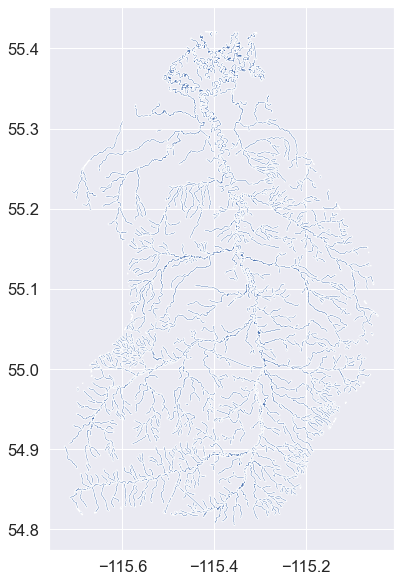

In [4]:
#Loading the swan river watershed buffer shapefile
swanriverbuffer = gpd.read_file('K:\geog250\PythonSWR/Shapefiles/water_linear_flow_2.shp')

# plot the data using geopandas .plot() method
fig, ax = plt.subplots(figsize = (10,10))
swanriverbuffer.plot(ax=ax)
plt.show()

In [5]:
# convert to EPSG:26911 to match raster
geo_swanriverbuffer = swanriverbuffer.to_crs('NAD83(HARN) / UTM zone 11N')
geo_swanriverbuffer.head()
# check:
print(geo_swanriverbuffer.crs == 'NAD83(HARN) / UTM zone 11N')

True


In [6]:
#Checking crs
print('geo_swanriverbuffer crs: ', geo_swanriverbuffer.crs)
print('merged_band3 crs: ', merged_band3.rio.crs)

geo_swanriverbuffer crs:  NAD83(HARN) / UTM zone 11N
merged_band3 crs:  EPSG:26911


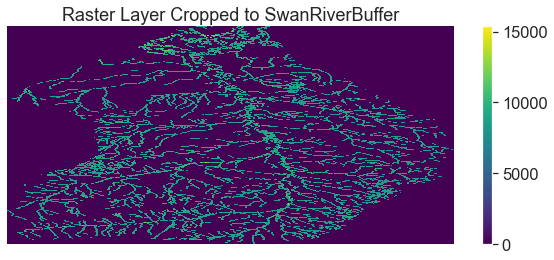

In [7]:
#Clipping
band3_clipped = merged_band3.rio.clip(geo_swanriverbuffer.geometry.apply(mapping),
                                      # This is needed if your GDF is in a diff CRS than the raster data
                                      geo_swanriverbuffer.crs)

f, ax = plt.subplots(figsize=(10, 4))
band3_clipped.plot(ax=ax)
ax.set(title="Raster Layer Cropped to SwanRiverBuffer")
ax.set_axis_off()
plt.show()

In [8]:
#Export the clipped file
path_to_tif_file = os.path.join("Landsat C2 L2 BF", "MergedLandSatBands","band3_clipped.tif") 

# Write the data to a new geotiff file
band3_clipped.rio.to_raster(path_to_tif_file)

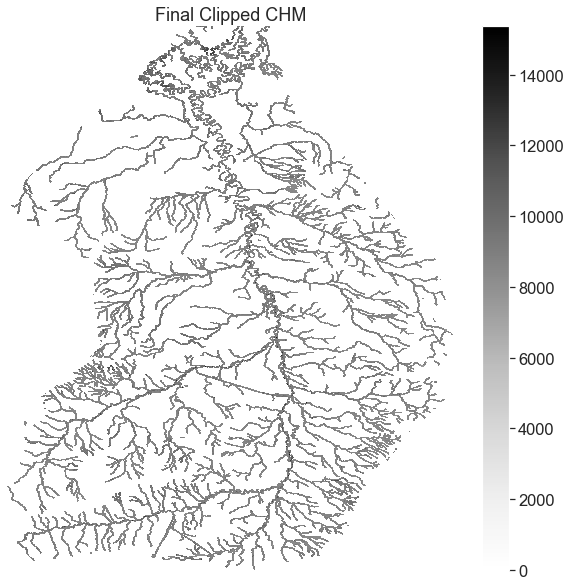

In [9]:
# Open the data you wrote out above
clipped_band3 = rxr.open_rasterio(path_to_tif_file)

# Customize your plot as you wish!
f, ax = plt.subplots(figsize=(10, 10))
clipped_band3.plot(ax=ax,
                 cmap='Greys')
ax.set(title="Final Clipped CHM")
ax.set_axis_off()
plt.show()

# Doing the other two bands now
We won't be able to tell if this was successful until the last step when we make an rgb image of the three bands.

In [10]:
#Band 2
#Loading raster data
merged_band2 = rxr.open_rasterio("Landsat C2 L2 BF/MergedLandSatBands/Landsat_Band2.tif")
print('merged_band2 crs: ', merged_band2.rio.crs)

merged_band2 crs:  EPSG:26911


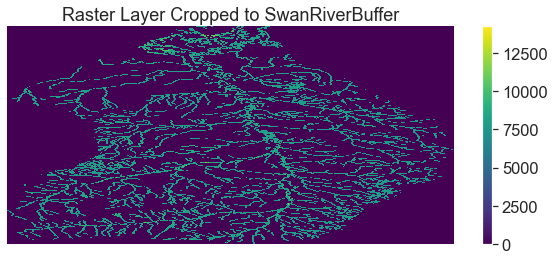

In [11]:
#Clipping
band2_clipped = merged_band2.rio.clip(geo_swanriverbuffer.geometry.apply(mapping),
                                      # This is needed if your GDF is in a diff CRS than the raster data
                                      geo_swanriverbuffer.crs)

f, ax = plt.subplots(figsize=(10, 4))
band2_clipped.plot(ax=ax)
ax.set(title="Raster Layer Cropped to SwanRiverBuffer")
ax.set_axis_off()
plt.show()

In [12]:
#Export the clipped file
path_to_tif_file2 = os.path.join("Landsat C2 L2 BF", "MergedLandSatBands","band2_clipped.tif") 

# Write the data to a new geotiff file
band2_clipped.rio.to_raster(path_to_tif_file2)

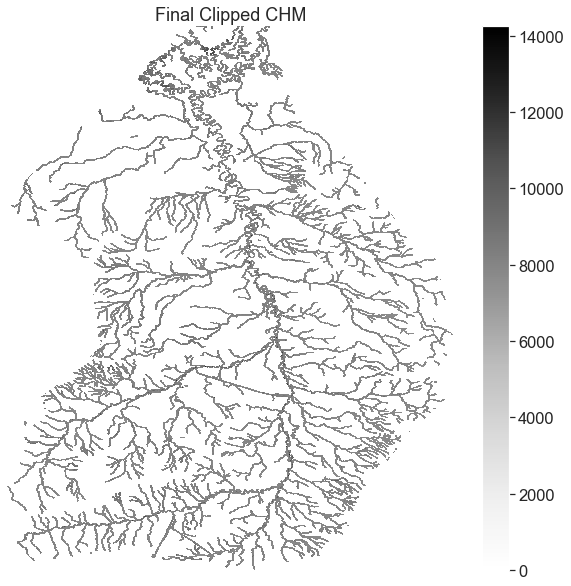

In [13]:
# Open the data you wrote out above
clipped_band2 = rxr.open_rasterio(path_to_tif_file2)

#Customize your plot as you wish
f, ax = plt.subplots(figsize=(10, 10))
clipped_band2.plot(ax=ax,
                 cmap='Greys')
ax.set(title="Final Clipped CHM")
ax.set_axis_off()
plt.show()

In [14]:
#looks the same but let's push forward, Band 4
merged_band4 = rxr.open_rasterio("Landsat C2 L2 BF/MergedLandSatBands/Landsat_Band4.tif")
print('merged_band4 crs: ', merged_band4.rio.crs)

merged_band4 crs:  EPSG:2955


In [15]:
#merged_band4 had a different crs than the other two, changing that
crs_26911 = CRS.from_string('EPSG:26911')
merged_band4 = merged_band4.rio.reproject(crs_26911)
print('merged_band4 crs: ', merged_band4.rio.crs)

merged_band4 crs:  EPSG:26911


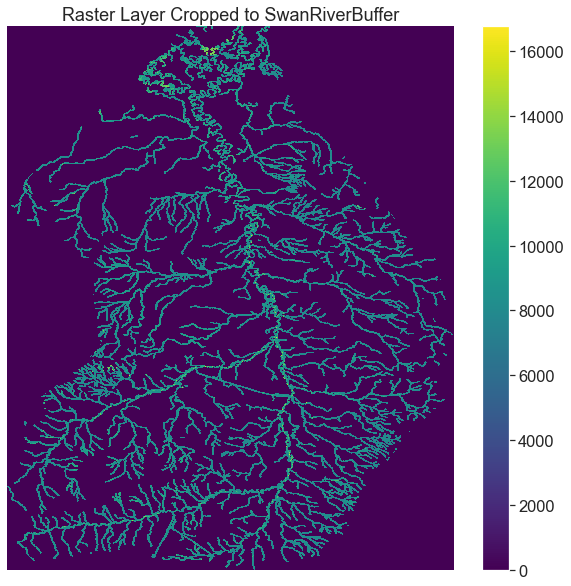

In [16]:
#Clipping
band4_clipped = merged_band4.rio.clip(geo_swanriverbuffer.geometry.apply(mapping),
                                      # This is needed if your GDF is in a diff CRS than the raster data
                                      geo_swanriverbuffer.crs)

f, ax = plt.subplots(figsize=(10, 10))
band4_clipped.plot(ax=ax)
ax.set(title="Raster Layer Cropped to SwanRiverBuffer")
ax.set_axis_off()
plt.show()

In [17]:
#Export the clipped file
path_to_tif_file4 = os.path.join("Landsat C2 L2 BF", "MergedLandSatBands","band4_clipped.tif") 

# Write the data to a new geotiff file
band4_clipped.rio.to_raster(path_to_tif_file4)

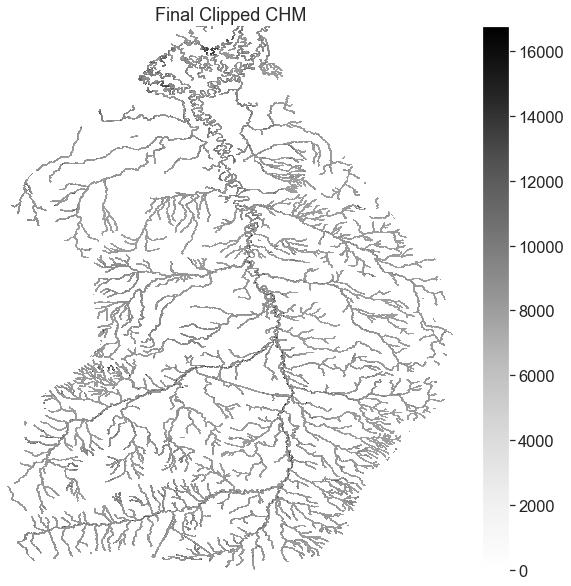

In [18]:
# Open the data you wrote out above
clipped_band4 = rxr.open_rasterio(path_to_tif_file4)

# Customize your plot as you wish!
f, ax = plt.subplots(figsize=(10, 10))
clipped_band4.plot(ax=ax,
                 cmap='Greys')
ax.set(title="Final Clipped CHM")
ax.set_axis_off()
plt.show()

# RBG Plot to confirm they aren't just the same file

In [19]:
#Pulling out newly clipped images
landsat_clipped = os.path.join("Landsat C2 L2 BF", "MergedLandsatBands")
post_clipped = glob(os.path.join(landsat_clipped,
                                        "*clipped*.TIF"))
post_clipped.sort()
post_clipped

['Landsat C2 L2 BF\\MergedLandsatBands\\band2_clipped.tif',
 'Landsat C2 L2 BF\\MergedLandsatBands\\band3_clipped.tif',
 'Landsat C2 L2 BF\\MergedLandsatBands\\band4_clipped.tif']

In [20]:
def open_clean_bands(band_path):
    """A function that opens a Landsat band as an (rio)xarray object

    Parameters
    ----------
    band_path : list
        A list of paths to the tif files that you wish to combine.
        
    Returns
    -------
    An single xarray object with the Landsat band data.

    """
     
    return rxr.open_rasterio(band_path, masked=True).squeeze()

In [22]:
#Run the above function
all_clipped_bands_2 = []
for i, aband in enumerate(post_clipped):
    all_clipped_bands_2.append(open_clean_bands(aband))
    # Assign a band number to the new xarray object
    all_clipped_bands_2[i]["band"]=i+1

In [25]:
#Turn the bands into an xarray for plotting
landsat_post_clipped = xr.concat(all_clipped_bands_2, dim="band") 
landsat_post_clipped

<xarray.DataArray (band: 3, y: 2284, x: 1448)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * band         (band) int64 1 2 3
  * x            (x) float64 5.817e+05 5.817e+05 ... 6.25e+05 6.251e+05
  * y            (y) float64 6.143e+06 6.143e+06 ... 6.074e+06 6.074e+06
    spatial_ref  int32 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

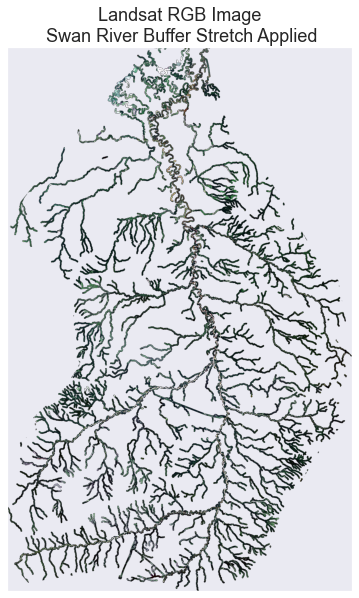

In [26]:
#Plot bands as a rgb composite image
ep.plot_rgb(landsat_post_clipped.values,
            rgb=[2,1,0],
            title="Landsat RGB Image\n Swan River Buffer Stretch Applied",
            stretch=True,
            str_clip=1)
plt.show()